In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [96]:
data = pd.read_csv('dataset.csv')

In [97]:
data.head(10)

,Commune,Etage,Superficie,Piece,Electricite,Gaz,Eau,Acte notarie,Jardin,Livret foncier,Meuble,Garage,Prix
0,1,1.0,144,4.0,1,1,1,1,0,0,0,0,2300.0
1,1,4.0,70,3.0,0,0,0,0,0,0,0,0,1500.0
2,1,3.0,102,3.0,1,1,1,1,1,1,0,0,2000.0
3,1,2.0,78,3.0,0,0,0,0,0,0,0,0,1300.0
4,1,2.0,50,2.0,0,0,0,0,0,0,0,0,1500.0
5,1,5.0,76,3.0,1,1,1,1,0,1,0,0,1100.0
6,1,2.0,180,5.0,1,1,1,1,0,1,0,0,1650.0
7,1,2.0,75,3.0,1,1,1,1,0,0,0,0,1250.0
8,1,3.0,180,6.0,1,1,0,0,0,0,0,1,1400.0
9,1,3.0,76,3.0,1,1,1,1,0,1,0,0,1500.0


In [98]:
data.shape

(3552, 13)

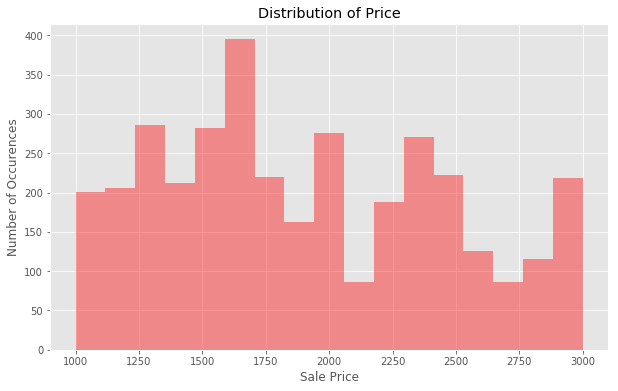

In [99]:
sns.distplot(data['Prix'], color="r", kde=False)
plt.title("Distribution of Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")
plt.show()

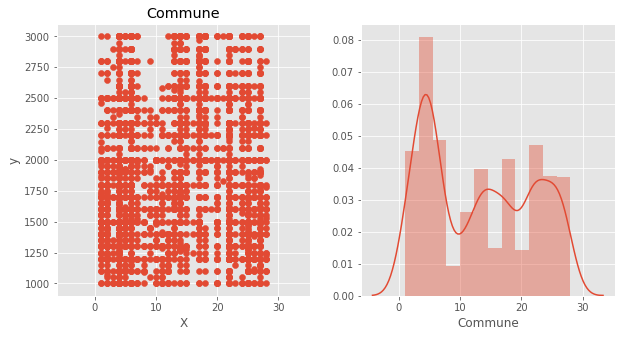

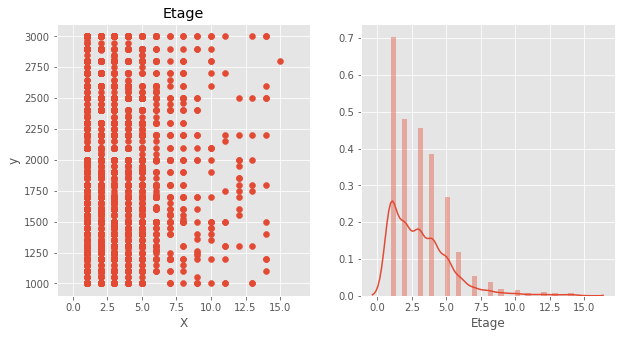

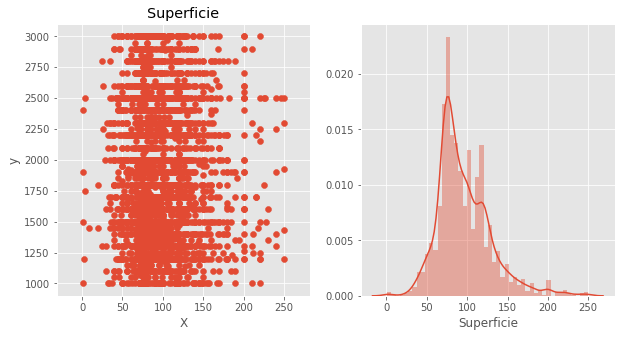

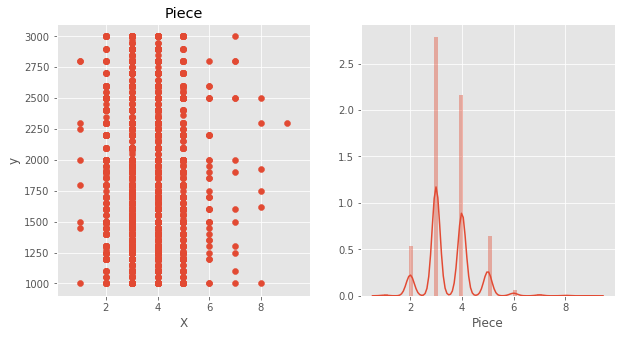

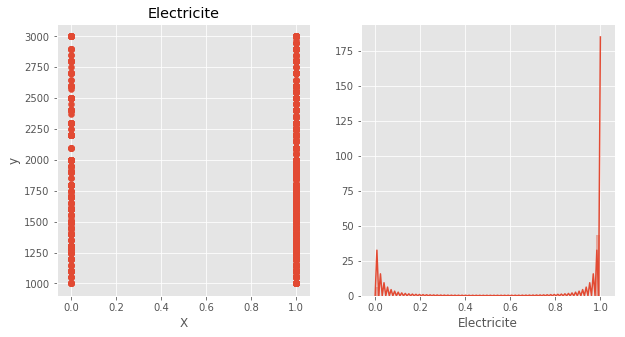

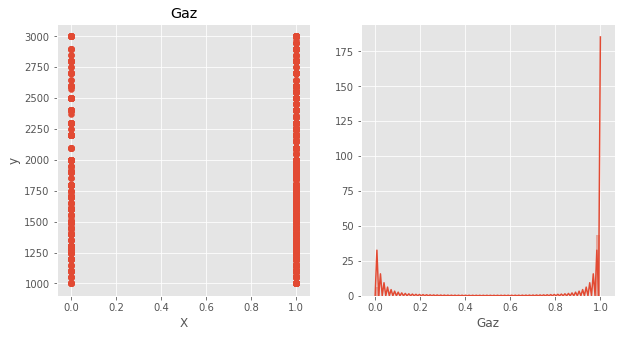

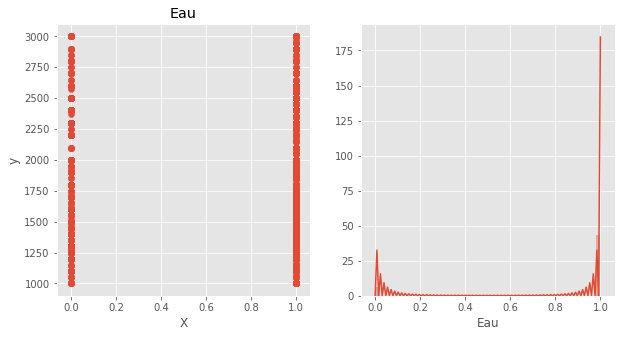

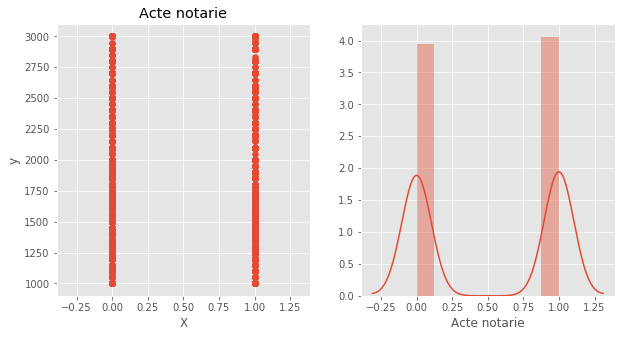

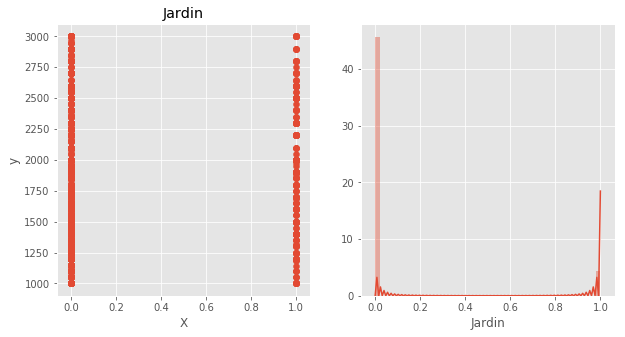

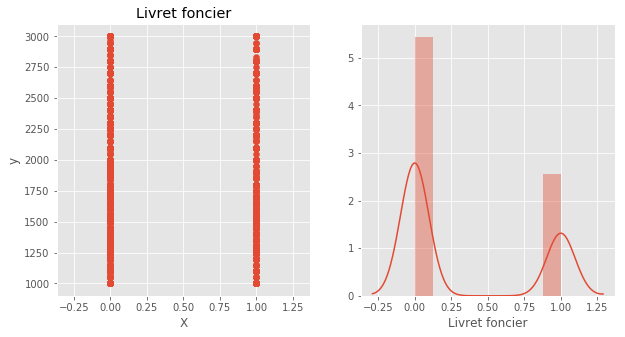

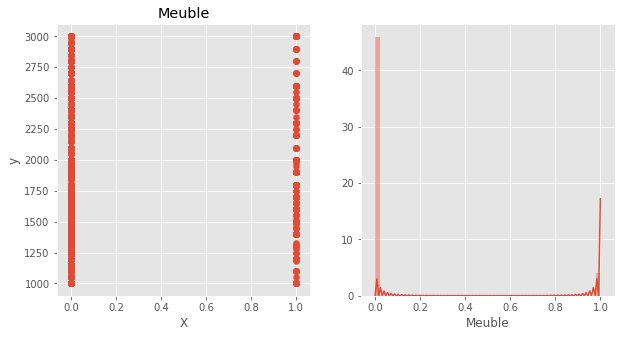

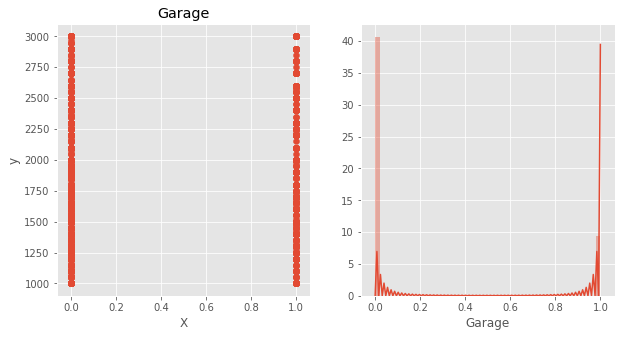

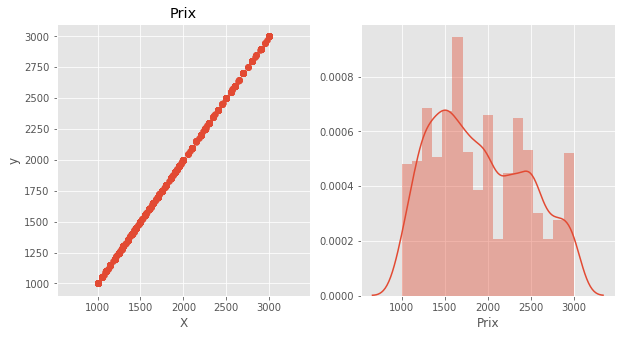

In [100]:
def plot_feature(X):
    y = data.loc[X.index, 'Prix']
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(X.name)
    
for feature in data.columns:
    X = data[feature].dropna()
    fig , (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharex=True)
    plt.subplot(ax1)
    plot_feature(X)
    plt.subplot(ax2)
    if data[feature].dtype == np.dtype('object'):
        sns.countplot(X)
    else:
        sns.distplot(X)
        
plt.show()

Skew is: 0.306238425737


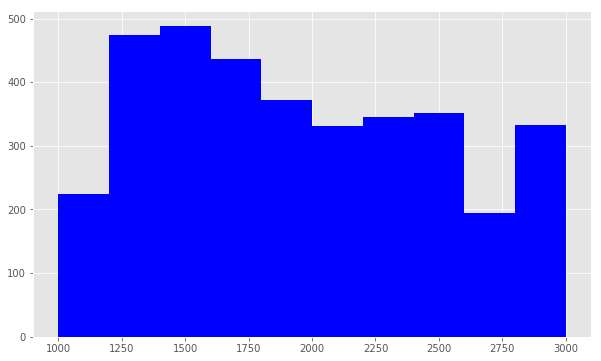

In [101]:
print ("Skew is:", data.Prix.skew())
plt.hist(data.Prix, color='blue')
plt.show()

In [102]:
from sklearn.preprocessing import MinMaxScaler

#num_columns = data.columns.values.tolist()

#scaler = MinMaxScaler()
#data.loc[:,num_columns] = scaler.fit_transform(data[num_columns])

#data[num_columns].head(5)

In [103]:
y = data['Prix']
X = data.drop(['Prix'], axis =1)

In [104]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

from sklearn.cross_validation import KFold, cross_val_score, cross_val_predict
k_fold = KFold(len(y), n_folds=10, shuffle=True, random_state=0)

In [105]:
# Linear Regression
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

# Score model
cross_valid_scores = cross_val_score(regressor, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", regressor.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests

Test score is: 
 -0.00462437366413
Cross validation test scores are: 
 [ 0.00827682 -0.01155447  0.00730195 -0.01231415 -0.00770797]
Cross validation test scores mean is: 
 -0.00319956354661


In [106]:
from xgboost import XGBRegressor

XGBoost = XGBRegressor(n_estimators = 1000,learning_rate=0.0585)
XGBoost.fit(X_train, y_train)

# Score model
cross_valid_scores = cross_val_score(XGBoost, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", XGBoost.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests

Test score is: 
 -0.0102231246153
Cross validation test scores are: 
 [ 0.00447848 -0.17849306 -0.11050587 -0.05235504 -0.17839623]
Cross validation test scores mean is: 
 -0.103054344141


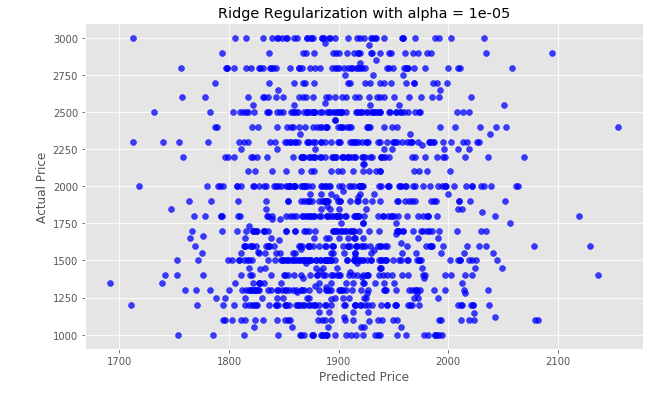

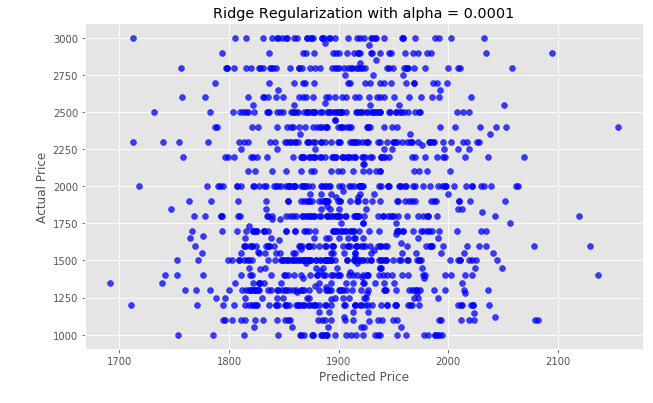

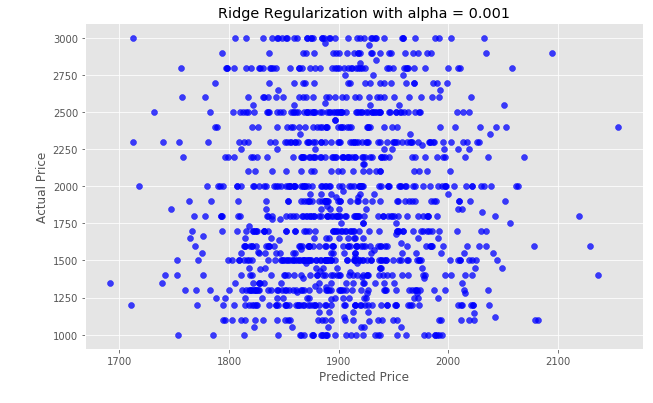

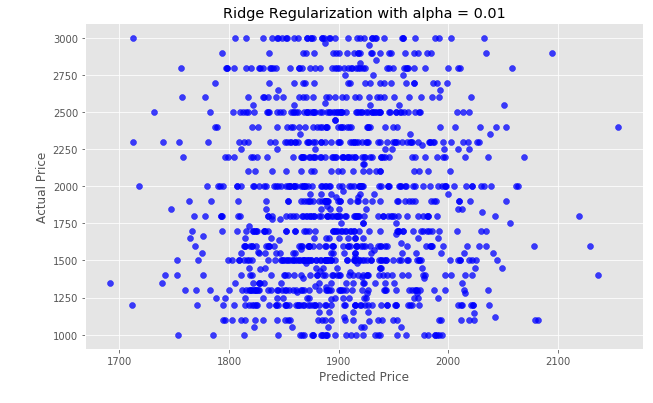

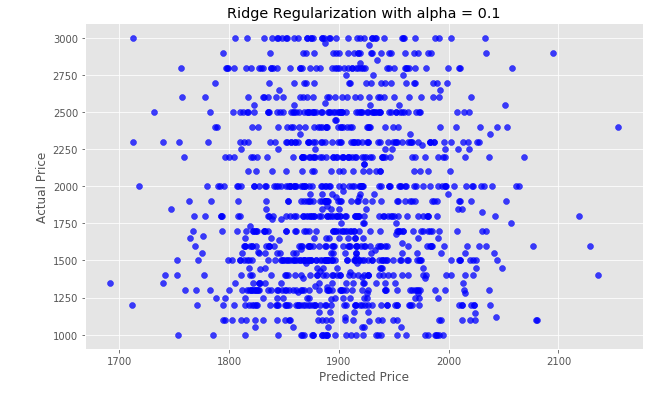

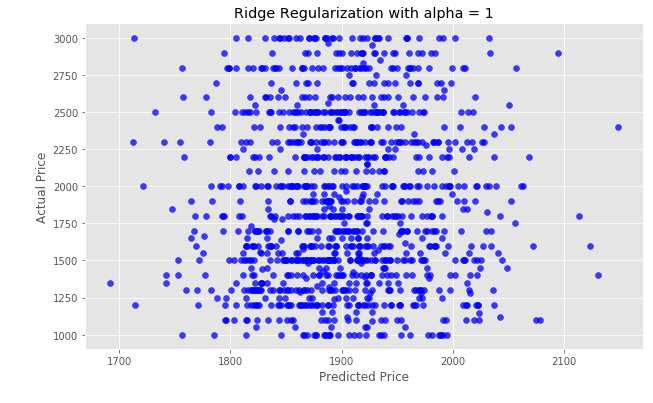

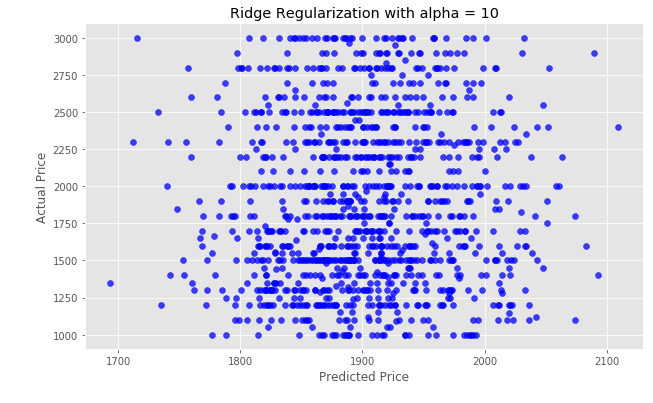

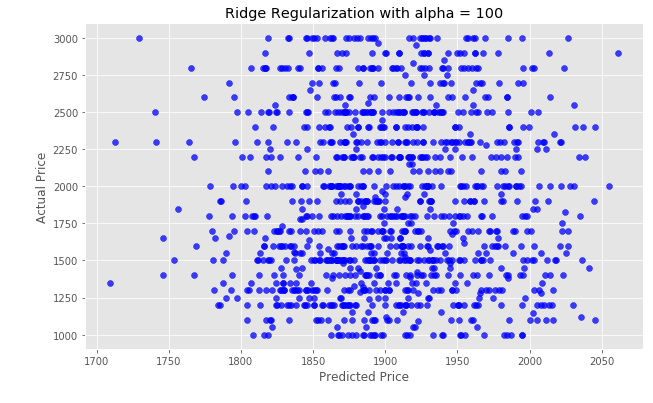

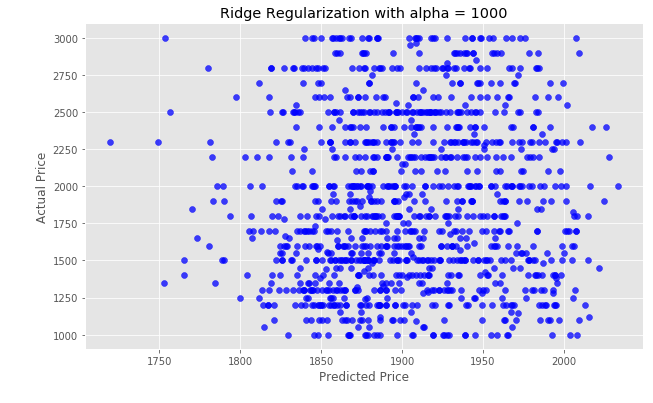

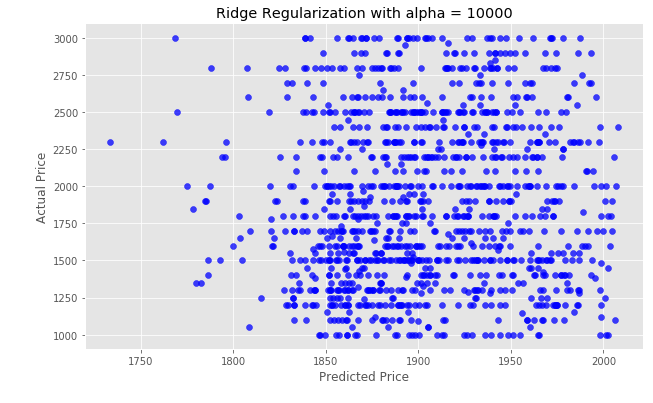

In [107]:
#to check what alpha value is better for the model

for i in range (-5, 5):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, y_test, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [108]:
from sklearn.metrics import mean_squared_error

linm = linear_model.Ridge(alpha = 10000)

linm.fit(X_train, y_train)

# Score model
cross_valid_scores = cross_val_score(linm, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", linm.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests


Test score is: 
 0.00250333265825
Cross validation test scores are: 
 [ 0.00634061  0.00579429 -0.00026129  0.00204642 -0.00687434]
Cross validation test scores mean is: 
 0.00140913521537
